In [124]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
submission= pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
train=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test =pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [127]:
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [128]:
test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [129]:
submission.head(5)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [130]:
y = train['Transported']*1

In [131]:
train = train.drop('Transported',axis=1)

In [132]:
all = pd.concat([train,test],axis=0)

In [133]:
all[['CryoSleep','VIP']]=all[['CryoSleep','VIP']]*1

In [134]:
sleepers= ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa','VRDeck']
for sleeper in sleepers:
    print(all.loc[(all['CryoSleep'] == 1) & (all[sleeper].isnull())][sleeper].isna().sum())

93
109
131
107
91


In [135]:
sleepers= ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa','VRDeck']

for sleeper in sleepers:
    all.loc[(all['CryoSleep'] == 1) & (all[sleeper].isnull()), sleeper] = 0

In [136]:
sleepers= ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa','VRDeck']

for sleeper in sleepers:
    
    print(all.loc[(all['CryoSleep'] == 1) & (all[sleeper].isnull()), sleeper].sum())

0.0
0.0
0.0
0.0
0.0


In [137]:
print(all[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa','VRDeck']].isnull().sum())
all.loc[(all['RoomService'].isnull()) & 
    (all['FoodCourt'] ==0)&
    (all['ShoppingMall'] ==0) &
    (all['Spa'] ==0)&
    (all['VRDeck'] ==0),'RoomService'
   ] = 0

all.loc[(all['FoodCourt'].isnull()) & 
    (all['RoomService'] ==0)&
    (all['ShoppingMall'] ==0) &
    (all['Spa'] ==0)&
    (all['VRDeck'] ==0),'FoodCourt'
   ] = 0

all.loc[(all['ShoppingMall'].isnull()) & 
    (all['FoodCourt'] ==0)&
    (all['RoomService'] ==0) &
    (all['Spa'] ==0)&
    (all['VRDeck'] ==0),'ShoppingMall'
   ] = 0

all.loc[(all['Spa'].isnull()) & 
    (all['FoodCourt'] ==0)&
    (all['ShoppingMall'] ==0) &
    (all['RoomService'] ==0)&
    (all['VRDeck'] ==0),'Spa'
   ] = 0
all.loc[(all['VRDeck'].isnull()) & 
    (all['FoodCourt'] ==0)&
    (all['ShoppingMall'] ==0) &
    (all['Spa'] ==0)&
    (all['RoomService'] ==0),'VRDeck'
   ] = 0
print(all[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa','VRDeck']].isnull().sum())

RoomService     170
FoodCourt       180
ShoppingMall    175
Spa             177
VRDeck          177
dtype: int64
RoomService     159
FoodCourt       170
ShoppingMall    161
Spa             164
VRDeck          144
dtype: int64


In [138]:
all = all.drop(['Name', 'PassengerId'],axis=1)

In [139]:
all['total_spent'] = all['RoomService']+all['FoodCourt']+all['ShoppingMall']+all['Spa']+all['VRDeck']

In [140]:
all.loc[(all['CryoSleep'].isnull()) & (all['total_spent'] == 0),'CryoSleep'] = 0

In [141]:
all.loc[all['CryoSleep'].isnull(),'CryoSleep'] = 1


In [142]:
pd.set_option('display.max_rows', None)
all.loc[all['Age']<=12,['VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = 0

In [143]:
all.loc[(all['HomePlanet'] == 'Earth') & all['Destination'].isnull(),'Destination'] = 'PSO J318.5-22'

In [144]:
all['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

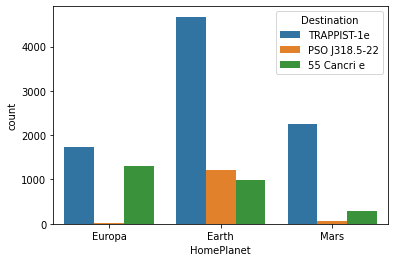

In [145]:
sns.countplot(data=all, x='HomePlanet',hue='Destination')

In [146]:
all['Cabin'] = all['Cabin'].fillna('XXX/XXX/XXX')

In [147]:
all['deck'] =all['Cabin'].apply(lambda x: x.split('/')[0])
all['side'] =all['Cabin'].apply(lambda x: x.split('/')[2])

In [148]:
all['deck'].unique()

array(['B', 'F', 'A', 'G', 'XXX', 'E', 'D', 'C', 'T'], dtype=object)

In [149]:
for side  in all['side'].unique():
    print(side)
    for deck in all['deck'].unique():
        print(deck,':',all[(all['deck'] == deck) &(all['side'] == side) ]['HomePlanet'].unique())

P
B : ['Europa' nan]
F : ['Earth' 'Mars' nan]
A : [nan 'Europa']
G : ['Earth' nan]
XXX : []
E : ['Earth' 'Europa' 'Mars' nan]
D : ['Mars' 'Europa' nan]
C : ['Europa' nan]
T : [nan 'Europa']
S
B : ['Europa' nan]
F : ['Earth' 'Mars' nan]
A : ['Europa' nan]
G : ['Earth' nan]
XXX : []
E : ['Earth' nan 'Mars' 'Europa']
D : ['Europa' 'Mars' nan]
C : ['Europa' nan]
T : ['Europa']
XXX
B : []
F : []
A : []
G : []
XXX : ['Earth' 'Mars' 'Europa' nan]
E : []
D : []
C : []
T : []


In [150]:
all.loc[(all['deck'] =='A' )&( all['HomePlanet'].isna()),'HomePlanet'] = 'Europa'
all.loc[(all['deck'] =='T' )&( all['HomePlanet'].isna()),'HomePlanet'] = 'Europa'
all.loc[(all['deck'] =='B' )&( all['HomePlanet'].isna()),'HomePlanet'] = 'Europa'
all.loc[(all['deck'] =='C' )&( all['HomePlanet'].isna()),'HomePlanet'] = 'Europa'
all.loc[(all['deck'] =='G' )&( all['HomePlanet'].isna()),'HomePlanet'] = 'Earth'

In [151]:
all['side'].unique()

array(['P', 'S', 'XXX'], dtype=object)

In [152]:
for deck in all['deck'].unique():
    print(deck,':',all[all['deck'] == deck]['Destination'].unique())

B : ['TRAPPIST-1e' '55 Cancri e' nan 'PSO J318.5-22']
F : ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
A : ['TRAPPIST-1e' '55 Cancri e' nan 'PSO J318.5-22']
G : ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' nan]
XXX : ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' nan]
E : ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' nan]
D : ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' nan]
C : ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' nan]
T : ['TRAPPIST-1e' '55 Cancri e']


<AxesSubplot:xlabel='deck', ylabel='count'>

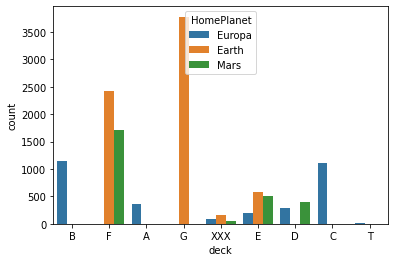

In [153]:

sns.countplot(data=all,x='deck',hue='HomePlanet')

<AxesSubplot:xlabel='deck', ylabel='count'>

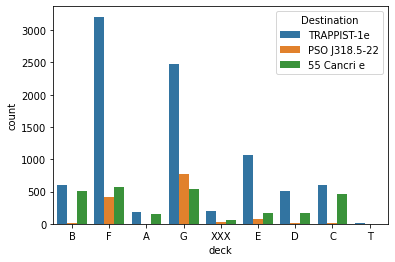

In [154]:
sns.countplot(data=all,x='deck',hue='Destination')

In [155]:
all.loc[all['deck'] == 'XXX','deck'] = 'F'

In [156]:
all.loc[all['side'] == 'XXX','side'] = 'P'

In [157]:
all = all.drop('Cabin',axis=1)

In [158]:
for col in all.select_dtypes(np.number).columns:
    all[col] =all[col].fillna(round(all[col].mean()))

In [159]:
all['Age'].unique()

array([39., 24., 58., 33., 16., 44., 26., 28., 35., 14., 34., 45., 32.,
       48., 31., 27.,  0.,  1., 49., 29., 10.,  7., 21., 62., 15., 43.,
       47.,  2., 20., 23., 30., 17., 55.,  4., 19., 56., 25., 38., 36.,
       22., 18., 42., 37., 13.,  8., 40.,  3., 54.,  9.,  6., 64., 67.,
       61., 50., 41., 57., 11., 52., 51., 46., 60., 63., 59.,  5., 79.,
       68., 74., 12., 53., 65., 71., 75., 70., 76., 78., 73., 66., 69.,
       72., 77.])

<AxesSubplot:>

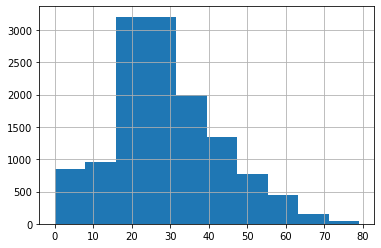

In [160]:
all['Age'].hist()

In [161]:
all['HomePlanet'].fillna('Earth',inplace=True)

<AxesSubplot:>

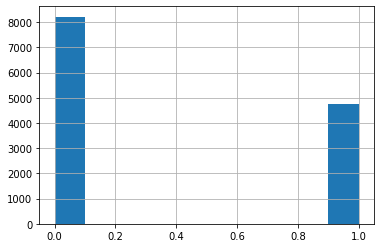

In [162]:
all['CryoSleep'].hist()

In [163]:
all['CryoSleep'].fillna(0,inplace=True)

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

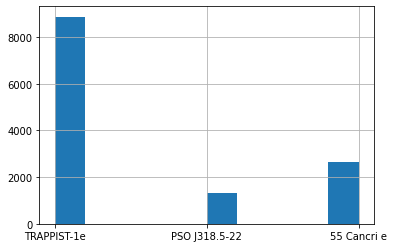

In [164]:
all['Destination'].hist()
all['Destination'].unique()

In [165]:
all['Destination'].fillna('TRAPPIST-1e',inplace=True)

array([0, 1, nan], dtype=object)

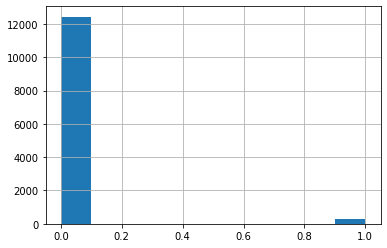

In [166]:
all['VIP'].hist()
all['VIP'].unique()

In [167]:
all['VIP'].fillna(0,inplace=True)

In [168]:
combo = all.copy()

In [169]:
combo = pd.get_dummies(combo)

In [170]:
train = combo.iloc[0:8693]
test = combo.iloc[8693:]

In [171]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.00001, random_state=10)

In [172]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)
#test = scaler.transform(test)

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

In [174]:
models = {'KNeighborsClassifier':KNeighborsClassifier(),
          'LogisticRegression':LogisticRegression(),
          'SVC': SVC(),
          'DecisionTreeClassifier':DecisionTreeClassifier(),
          'RandomForestClassifier':RandomForestClassifier(),
          'AdaBoostClassifier':AdaBoostClassifier(),
          'GaussianNB':GaussianNB(),
          'CatBoostClassifier':CatBoostClassifier(verbose=0)
         }

In [175]:
score = []
x=0
#results = pd.DataFrame(y_test)
for name,model in models.items():
    x+=1
    #model.fit(X,y)
   # y_pred = model.predict(X_test)
    cvs = cross_val_score(estimator= model,X= train,y=y,cv=10)
    acc = cvs.mean()
    std = cvs.std()
    #score.append([name,accuracy_score(y_test,y_pred)])
    print(x,'/',len(models),name,round(acc,3),round(std,3))
    score.append([name,acc, std])
    #results[name] = y_pred
score = pd.DataFrame(score, columns=['model name', 'Accuracy','std'])
score.sort_values('Accuracy',ascending=False)

1 / 8 KNeighborsClassifier 0.765 0.017
2 / 8 LogisticRegression 0.789 0.017
3 / 8 SVC 0.794 0.018
4 / 8 DecisionTreeClassifier 0.743 0.022
5 / 8 RandomForestClassifier 0.797 0.012
6 / 8 AdaBoostClassifier 0.788 0.016
7 / 8 GaussianNB 0.701 0.044
8 / 8 CatBoostClassifier 0.812 0.015


,model name,Accuracy,std
7,CatBoostClassifier,0.811808,0.014880
4,RandomForestClassifier,0.796623,0.012475
2,SVC,0.793864,0.018489
1,LogisticRegression,0.788571,0.017146
5,AdaBoostClassifier,0.788342,0.016267
0,KNeighborsClassifier,0.765104,0.017472
3,DecisionTreeClassifier,0.743246,0.021601
6,GaussianNB,0.701037,0.043558


In [176]:
cat = CatBoostClassifier(verbose=0)
cat.fit(train,y)
cat_pred = cat.predict(test)

from sklearn.model_selection import GridSearchCV
params = {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }
Grid_CBC = GridSearchCV(estimator=cat, param_grid = params, n_jobs=-1,verbose=99)
Grid_CBC.fit(X_train, y_train)

In [177]:
cat_pred

array([1, 0, 1, ..., 1, 1, 1])

In [178]:
submission['Transported'] = cat_pred

In [179]:
submission['Transported'] =submission['Transported'].astype(bool)

In [180]:
submission.to_csv("submission.csv", index=False)